In [24]:
import pandas as pd
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

customers = pd.read_csv(r'C:\Users\Lenovo\Dropbox\PC\Downloads\Customers.csv')
transactions = pd.read_csv(r'C:\Users\Lenovo\Dropbox\PC\Downloads\Transactions.csv')

merged_data = transactions.merge(customers, on='CustomerID', how='left')

print("Merged Dataset:")
print(merged_data.head())

customer_profiles = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',              
    'TransactionID': 'count',          
    'Quantity': 'sum',                 
}).reset_index()

customer_profiles.rename(columns={
    'TotalValue': 'TotalSpending',
    'TransactionID': 'PurchaseFrequency',
    'Quantity': 'TotalQuantity'
}, inplace=True)

print("Customer Profiles:")
print(customer_profiles.head())

scaler = StandardScaler()
customer_profiles_scaled = scaler.fit_transform(customer_profiles.drop(['CustomerID'], axis=1))

print("Scaled Customer Profiles:")
print(customer_profiles_scaled[:5])

kmeans = KMeans(n_clusters=4, random_state=42)
agglomerative = AgglomerativeClustering(n_clusters=4)
dbscan = DBSCAN(eps=0.5, min_samples=5)
gmm = GaussianMixture(n_components=4, random_state=42)

kmeans_labels = kmeans.fit_predict(customer_profiles_scaled)
agglomerative_labels = agglomerative.fit_predict(customer_profiles_scaled)
dbscan_labels = dbscan.fit_predict(customer_profiles_scaled)
gmm_labels = gmm.fit_predict(customer_profiles_scaled)

customer_profiles['KMeans_Cluster'] = kmeans_labels
customer_profiles['Agglomerative_Cluster'] = agglomerative_labels
customer_profiles['DBSCAN_Cluster'] = dbscan_labels
customer_profiles['GMM_Cluster'] = gmm_labels

print("Customer Profiles with KMeans Clusters:")
print(customer_profiles.head())

db_index_kmeans = davies_bouldin_score(customer_profiles_scaled, kmeans_labels)
db_index_agglomerative = davies_bouldin_score(customer_profiles_scaled, agglomerative_labels)
db_index_dbscan = davies_bouldin_score(customer_profiles_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else None
db_index_gmm = davies_bouldin_score(customer_profiles_scaled, gmm_labels)

print("Davies-Bouldin Index:")
print(f"KMeans: {db_index_kmeans}")
print(f"Agglomerative: {db_index_agglomerative}")
print(f"DBSCAN: {db_index_dbscan}")
print(f"GMM: {db_index_gmm}")


Merged Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price     CustomerName         Region  SignupDate  
0      300.68  300.68   Andrea Jenkins         Europe  2022-12-03  
1      300.68  300.68  Brittany Harvey           Asia  2024-09-04  
2      300.68  300.68  Kathryn Stevens         Europe  2024-04-04  
3      601.36  300.68  Travis Campbell  South America  2024-04-11  
4      902.04  300.68    Timothy Perez         Europe  2022-03-15  
Customer Profiles:
  CustomerID  TotalSpending  PurchaseFrequency  TotalQuantity
0      C0001        3354.52                  5             12
1     

C:\Users\Lenovo\anaconda3\anoconda6\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\anoconda6\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


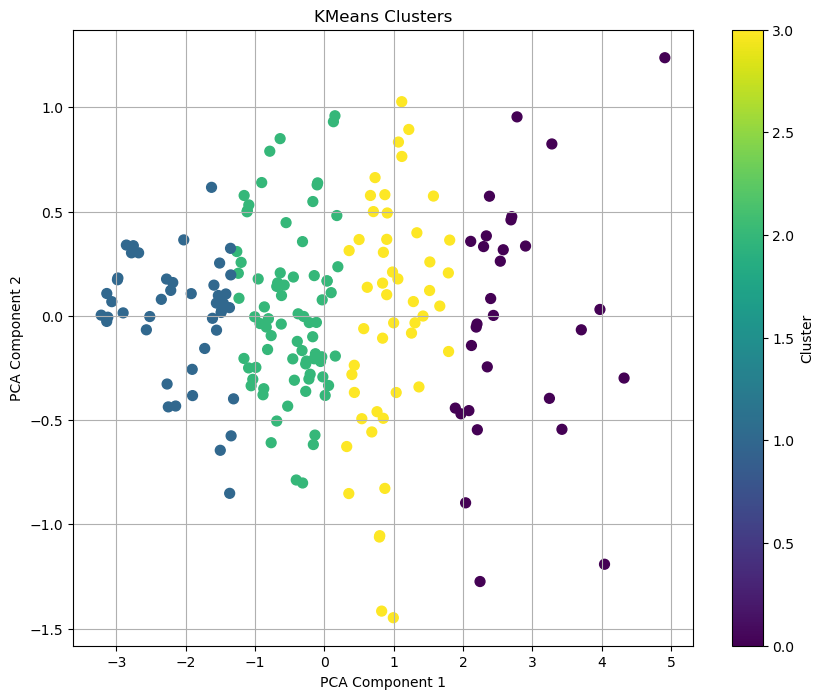

In [22]:
pca = PCA(n_components=2)
reduced_data_kmeans = pca.fit_transform(customer_profiles_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_data_kmeans[:, 0], reduced_data_kmeans[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('KMeans Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()



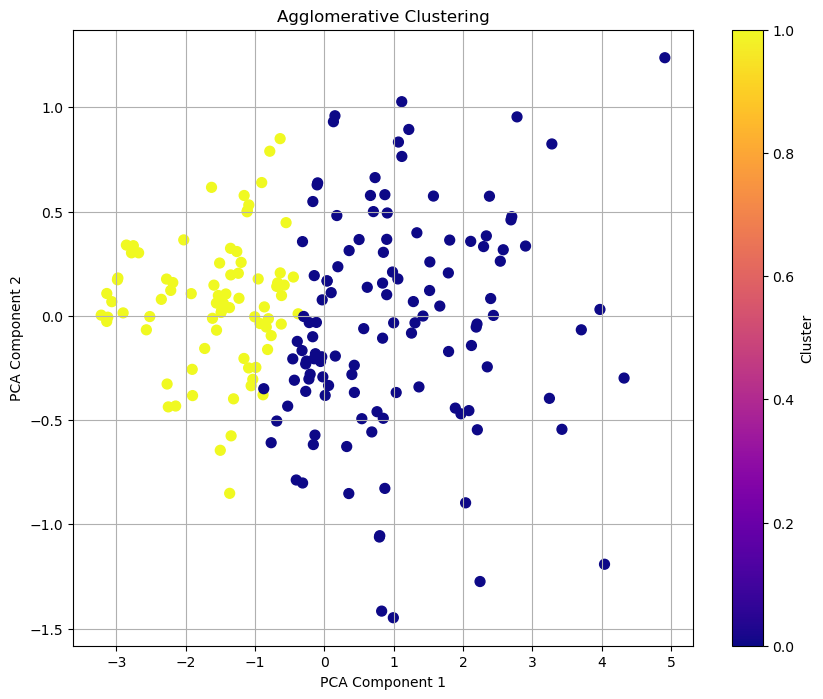

In [20]:
agglomerative = AgglomerativeClustering(n_clusters=2)
agglomerative_labels = agglomerative.fit_predict(customer_profiles_scaled)

reduced_data_agglomerative = pca.fit_transform(customer_profiles_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_data_agglomerative[:, 0], reduced_data_agglomerative[:, 1], c=agglomerative_labels, cmap='plasma', s=50)
plt.title('Agglomerative Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

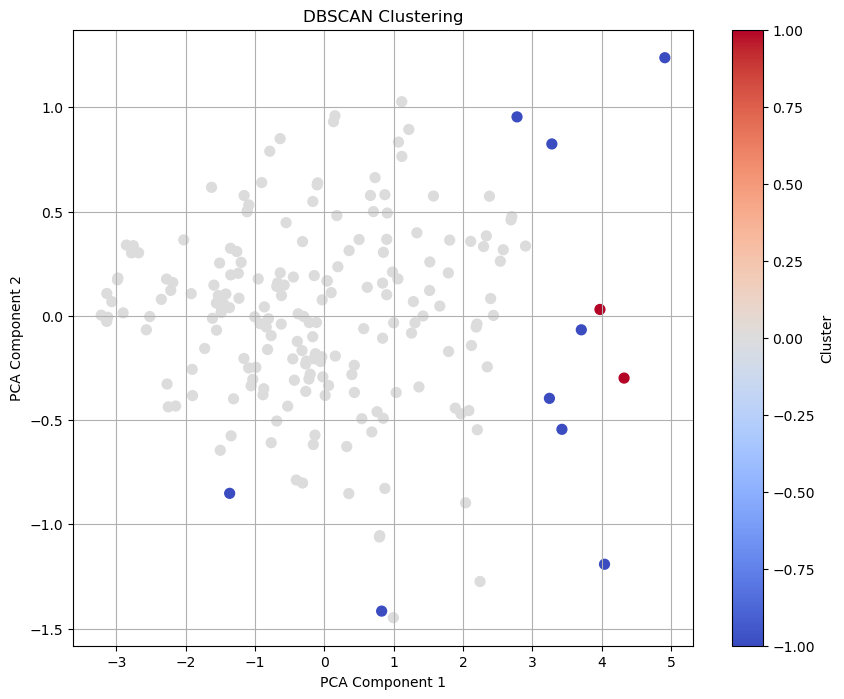

In [21]:
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(customer_profiles_scaled)

reduced_data_dbscan = pca.fit_transform(customer_profiles_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_data_dbscan[:, 0], reduced_data_dbscan[:, 1], c=dbscan_labels, cmap='coolwarm', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

C:\Users\Lenovo\anaconda3\anoconda6\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


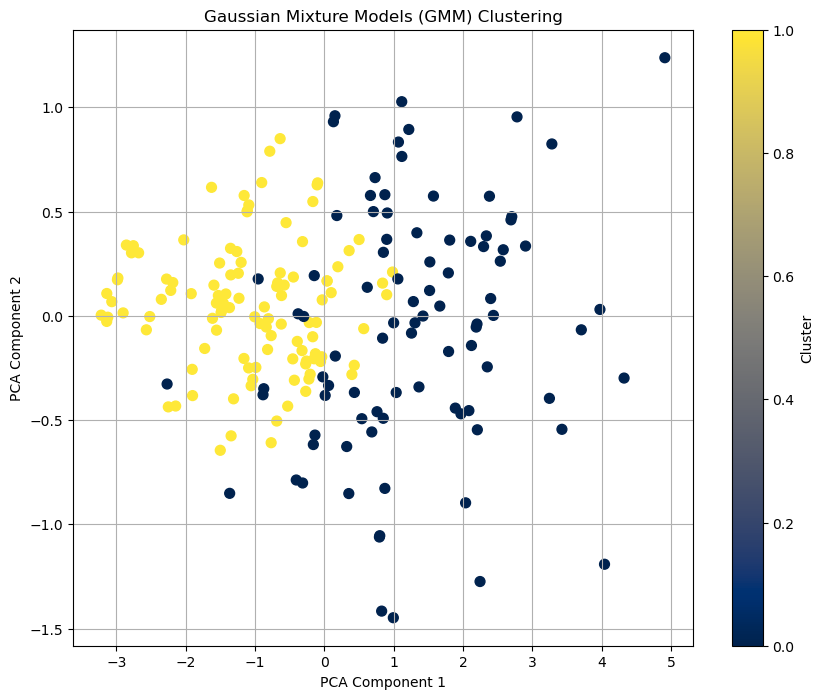

In [23]:
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(customer_profiles_scaled)

reduced_data_gmm = pca.fit_transform(customer_profiles_scaled)
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data_gmm[:, 0], reduced_data_gmm[:, 1], c=gmm_labels, cmap='cividis', s=50)
plt.title('Gaussian Mixture Models (GMM) Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()